## Importing libraries and files

In [1]:
import pandas as pd
from keras.models import load_model
import pickle
import numpy as np
import matplotlib.pyplot as plt

ann_arr = load_model('Arrival_time/Arrival_ANN_model_3.h5')
ann_end = load_model('End_time/End_ANN_model_8.h5')
ann_chg = load_model('Change_time/Change_ANN_model_3.h5')
regressor = pickle.load(open('Pressure_profiles_codes_section_1_regression/XGB_14.sav', 'rb'))
sc = pickle.load(open('Pressure_profiles_codes_section_1_regression/scaler.pkl', 'rb'))

## Input details

In [2]:
charge_mass = 20
time = 0.005
atm_pressure = 101200

In [50]:
start, stop, n_values = -5, 5, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)
print (X.shape)

npts = 800
px, py = np.random.choice(x_vals, npts), np.random.choice(y_vals, npts)
print (py.shape)

(800, 800)
(800,)


In [51]:
def f(X,Y, charge_mass, time, atm_pressure, ann_chg, ann_arr, ann_end, regressor, sc):
    Z = np.sqrt(X**2 + Y**2)
    #print ('Z.shape', Z.shape)

    c_d = Z.reshape(-1)
    c_d = c_d.reshape(len (c_d), 1)
    #print ('c_d', c_d, c_d.shape)
    
    c_m = np.repeat(charge_mass, len(c_d)).reshape(len(c_d),1)
    #print ('c_m', c_m.shape, c_m)

    c_t = np.repeat(time, len(c_d)).reshape(len(c_d),1)
    #print ('c_t', c_t.shape, c_t)
    
    c_arr = np.concatenate ((c_m, c_d), axis = 1)
    #print ('c_arr', c_arr)
    change_time = ann_chg.predict(c_arr)
    arrival_time = ann_arr.predict(c_arr)
    end_time = ann_end.predict(c_arr)
    
    print ('change_time', len(change_time), change_time)
    #print ('arrival_time', len(arrival_time),arrival_time)
    #print ('end_time', len (end_time), end_time)

    if time < change_time[0]:
        c_ph = np.array([[0, 1]])
    else:
        c_ph = np.array([[1, 0]])
    positive = np.array([0, 1])
    negative = np.array([1, 0])
    count =0
    for c_time in change_time[1:]:
        #print (c_time)
        if time < c_time:
            c_ph=np.vstack((c_ph,positive))
            count+=1
       
        else:
            c_ph=np.vstack((c_ph,negative))
            
        
    print ('c_ph', count, len(c_ph), c_ph)
    
    c_arr_2 = np.concatenate ((c_m, c_d, c_t, c_ph), axis = 1)
    print (c_arr_2)
    c_arr_2[:,0:3] = sc.transform(c_arr_2[:,0:3])
    c_p = regressor.predict(c_arr_2)
    #print (c_p)
    c_p = c_p.reshape(len (c_p), 1)
    print ('c_p_old',c_p)
    
    for index, (c_pressure,  c_arrival, c_end) in enumerate(zip(c_p, arrival_time, end_time)):
        if time < c_arrival:
            #print (c_arrival)
            c_p[index] = atm_pressure
            print (index)
        
        elif time > c_end:
            print (c_end)
            c_p[index] = atm_pressure
    
    print ('c_p_new',c_p.shape)
    #c_p_2 = c_p.reshape(400, 400)
    #print (c_p_2)
    return c_p
c_p_2 = f(px,py, charge_mass, time, atm_pressure, ann_chg, ann_arr, ann_end, regressor, sc)
c_p_2 = c_p_2.squeeze()
print (c_p_2.shape)

25/25 [==============================] - 0s 1ms/step
change_time 800 [[ 0.00951147]
 [ 0.00345894]
 [ 0.01242788]
 [ 0.00905824]
 [ 0.00665643]
 [ 0.00418631]
 [ 0.00691033]
 [ 0.00856009]
 [ 0.00663061]
 [ 0.00766738]
 [ 0.00562402]
 [ 0.00168561]
 [ 0.00509204]
 [ 0.00704823]
 [ 0.00856733]
 [ 0.00783008]
 [ 0.00930653]
 [ 0.00758713]
 [ 0.00720065]
 [ 0.00907915]
 [ 0.00376925]
 [ 0.00293995]
 [ 0.00607862]
 [ 0.00460543]
 [ 0.01296118]
 [ 0.00876185]
 [ 0.00599489]
 [ 0.00698425]
 [ 0.00924964]
 [ 0.01301571]
 [ 0.00672454]
 [ 0.0074288 ]
 [ 0.00274176]
 [ 0.001063  ]
 [ 0.00772115]
 [ 0.00857764]
 [ 0.00326567]
 [ 0.00784603]
 [ 0.00758756]
 [ 0.00673898]
 [ 0.00210558]
 [ 0.00464344]
 [ 0.00566564]
 [ 0.00390829]
 [ 0.00917894]
 [ 0.00750326]
 [ 0.00824616]
 [ 0.0090193 ]
 [ 0.00139628]
 [ 0.00897086]
 [ 0.00793043]
 [ 0.00872711]
 [ 0.00351545]
 [ 0.00416096]
 [ 0.00555988]
 [ 0.00777269]
 [ 0.00836524]
 [ 0.00437333]
 [ 0.00537163]
 [ 0.0072779 ]
 [ 0.01203875]
 [ 0.00815926]
 

[[101200. 101200. 101200. ... 101200. 101200. 101200.]
 [101200. 101200. 101200. ... 101200. 101200. 101200.]
 [101200. 101200. 101200. ... 101200. 101200. 101200.]
 ...
 [101200. 101200. 101200. ... 101200. 101200. 101200.]
 [101200. 101200. 101200. ... 101200. 101200. 101200.]
 [101200. 101200. 101200. ... 101200. 101200. 101200.]] (800, 800)


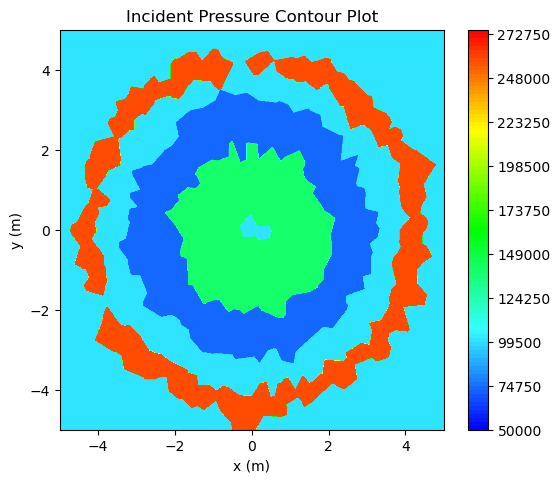

In [52]:
import matplotlib
from scipy.interpolate import griddata

cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.25, 0.2, 0.2),
                 (0.5, 0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
        'green':((0.0, 0.0, 0.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 1.0, 1.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
        'blue': ((0.0, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 0.0, 0.0),
                 (0.75, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

c_p_interpolate = griddata((px,py), c_p_2, (X,Y), method = 'nearest')
print (c_p_interpolate, c_p_interpolate.shape)

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
levels = np.linspace(50000, 275000, 101)
cp = plt.contourf(X, Y, c_p_interpolate, levels = levels, cmap = my_cmap) # c_p_interpolate
plt.colorbar(cp)

ax.set_title('Incident Pressure Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()